In [1]:
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D.utils import *
from PDE2D import PATH
import matplotlib.pyplot as plt
import os

distance = 0.01
iter_fd = 256
fd_step = 0.005
path_prb = os.path.join(PATH, "output2D", "finite_differences", "discrete-sdf", "prb")
path_fd = os.path.join(PATH, "output2D", "finite_differences", "discrete-sdf", "fd", f"fd{fd_step}")
prb_x = np.load(os.path.join(path_prb, f"gradx-d{distance}.npy"))
prb_y = np.load(os.path.join(path_prb, f"grady-d{distance}.npy"))

fd_x = []
fd_y = []
for i in range(iter_fd):
    fd_x.append(np.load(os.path.join(path_fd, f"x-{i}.npy")))
    fd_y.append(np.load(os.path.join(path_fd, f"y-{i}.npy")))

fd_x = np.sum(np.array(fd_x), axis = 0) / iter_fd
fd_y = np.sum(np.array(fd_y), axis = 0) / iter_fd

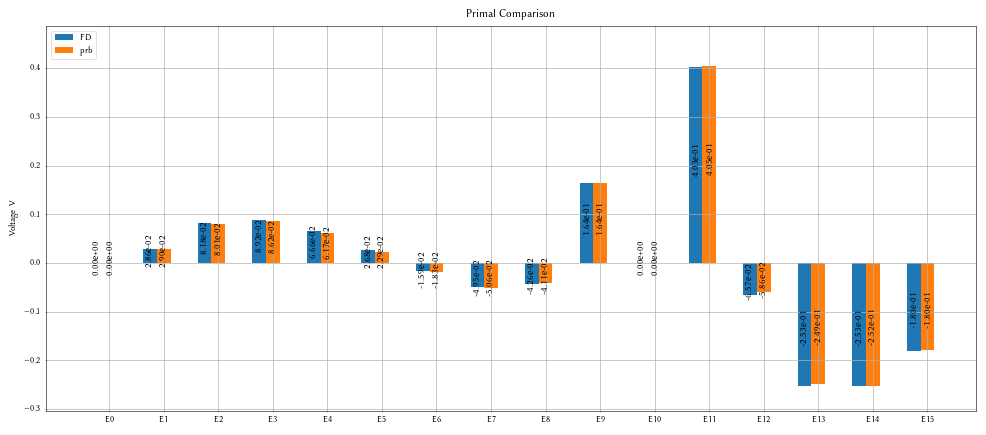

In [2]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
entry_nums = [1,2,3,4,5,6,7,8,9,11,12,13,14,15]
num_entries = 16
plot_primals(ax, prb_x[0], fd_x[0], entry_nums, num_entries, name1="prb", name2 = "FD")